In [1]:
# using BSON: @save
# using BSON: @load
# using CSV
# using DataFrames: DataFrame
# using Flux
# using Flux: logitbinarycrossentropy, binarycrossentropy
# using Flux.Data: DataLoader
# using Flux: chunk
# using ImageFiltering
# using MLDatasets: FashionMNIST
# using ProgressMeter: Progress, next!
# using Random
# using Zygote
# using MLDatasets
# using Images
# using ImageIO

# using NBInclude
# @nbinclude("functions.ipynb")

All function imported


In [9]:
using Pkg
Pkg.resolve()

┌ Warning: The active manifest file at `/Users/babhru/Documents/GitHub/GNN_Isometries/Manifest.toml` has an old format that is being maintained.
│ To update to the new format run `Pkg.upgrade_manifest()` which will upgrade the format without re-resolving.
└ @ Pkg.Types /Users/julia/buildbot/worker/package_macos64/build/usr/share/julia/stdlib/v1.7/Pkg/src/manifest.jl:287
  No Changes

 to `~/Documents/GitHub/GNN_Isometries/Project.toml`
  No Changes to `~/Documents/GitHub/GNN_Isometries/Manifest.toml`


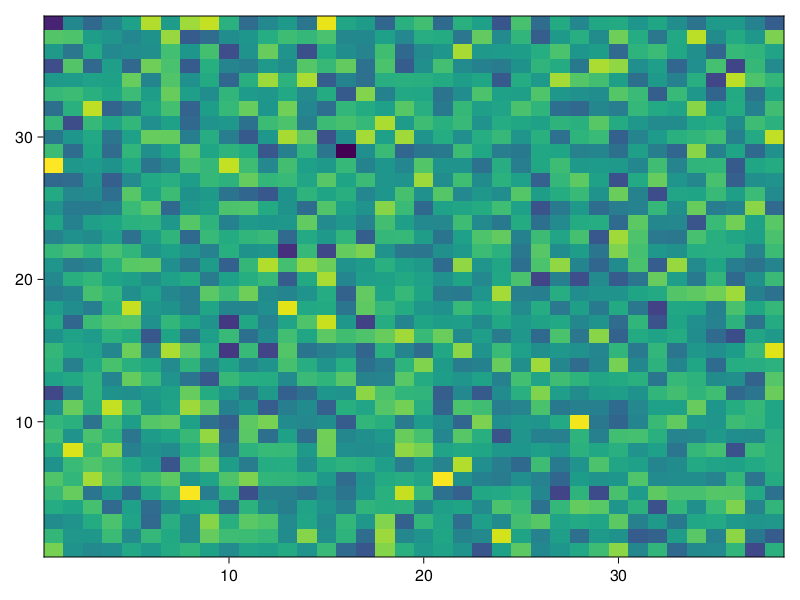

In [1]:
using CairoMakie
using Makie
heatmap(randn(38,38))

In [13]:
x = 10.0.^(1:0.1:4)
y = 1.0:0.1:5.0
data = x .* ones(Float64, 1, length(y))
fig = Figure()
ax, hm = heatmap(fig[1, 1], x, y, data,
	axis=(;xscale=log10, 
	# 	   xminorticksvisible=true, xminorticks=IntervalsBetween(9),
			colorrange = (1e-5, 1),
		#    colorscale=log10)
         ))
Colorbar(fig[1, 2], hm)
fig

MethodError: MethodError: no method matching initialize_block!(::Axis; colorrange=(1.0e-5, 1))
Closest candidates are:
  initialize_block!(::Axis; palette) at ~/.julia/packages/Makie/6TJFL/src/makielayout/blocks/axis.jl:168 got unsupported keyword argument "colorrange"
  initialize_block!(!Matched::Textbox) at ~/.julia/packages/Makie/6TJFL/src/makielayout/blocks/textbox.jl:1 got unsupported keyword argument "colorrange"
  initialize_block!(!Matched::LScene; scenekw) at ~/.julia/packages/Makie/6TJFL/src/makielayout/blocks/scene.jl:19 got unsupported keyword argument "colorrange"
  ...

In [26]:
n2 = 400
n1 = 100
k = 20
F = dct(diagm(ones(n2)),2);
G = Chain(
    Dense(k, n1, relu, bias = false; init =(out,in) -> randn(n1,k)/sqrt(n1)),
    Dense(n1, n2, relu, bias = false; init =(out,in) ->  randn(n2,n1)/sqrt(n2)),

)

ip = []
for i in 1:1000000
    temp = G(randn(k)); temp = temp/norm(temp)
    push!(ip, norm(F*temp, Inf))
end



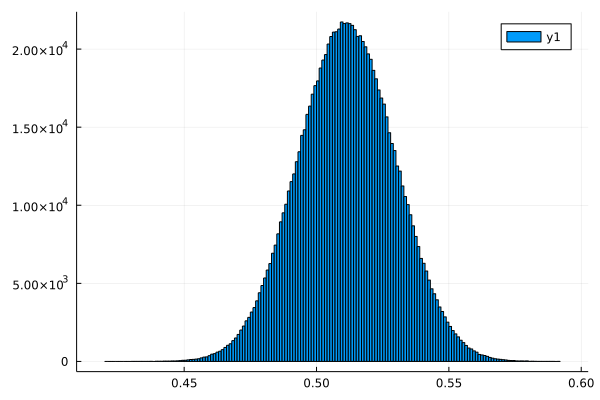

In [27]:
histogram(ip, bins = 200)


In [35]:
sqrt(k/n2) + sqrt(log(n2)/n2) + sqrt(k * log(2 * exp(1) * n1 / k )/n2)

0.5379676054197015

In [34]:
sqrt(n1/n2) 

0.7071067811865476

In [33]:
n2 = 1000
n1 = 500
k = 20

20

In [36]:
sqrt(k/n2)

0.1414213562373095